Diabetes prediction

In this project we are going to visualize various column and perform EDA to understand better, which factor affect the most in diabetic patient

Importing necessary library 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



Importing dataset

In [22]:

data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Performing data cleaning by replacing 0 data with mean

In [23]:
col_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zeros with NaN
data[col_check] = data[col_check].replace(0, np.nan)

# Replace NaN with column mean
for column in col_check:
    data[column].fillna(data[column].mean(), inplace=True)

# Display the updated DataFrame
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

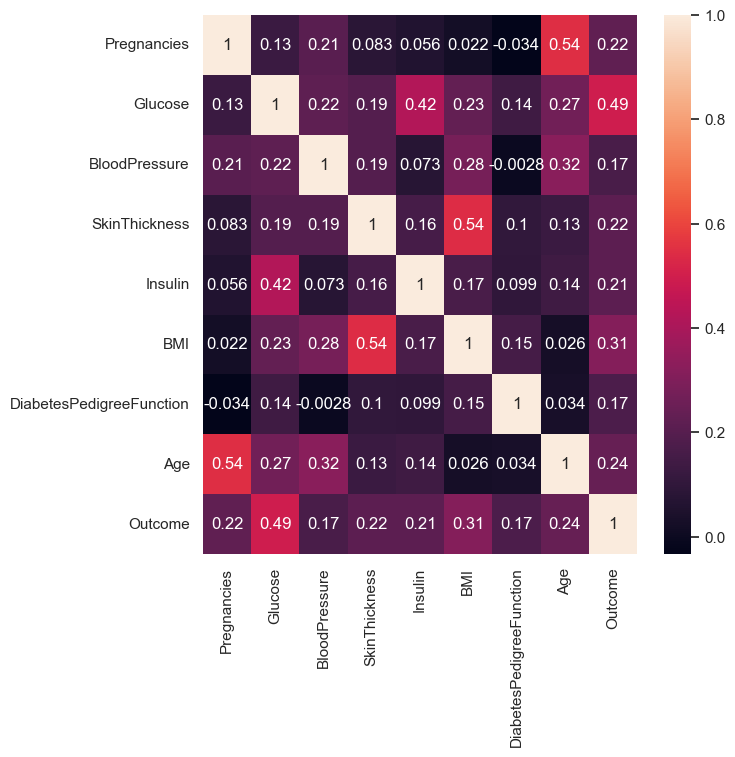

In [38]:
corr = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)

As we can see in correlation heatmap glucose, age and insulin seems to affect more to the outcome. Lets study it further

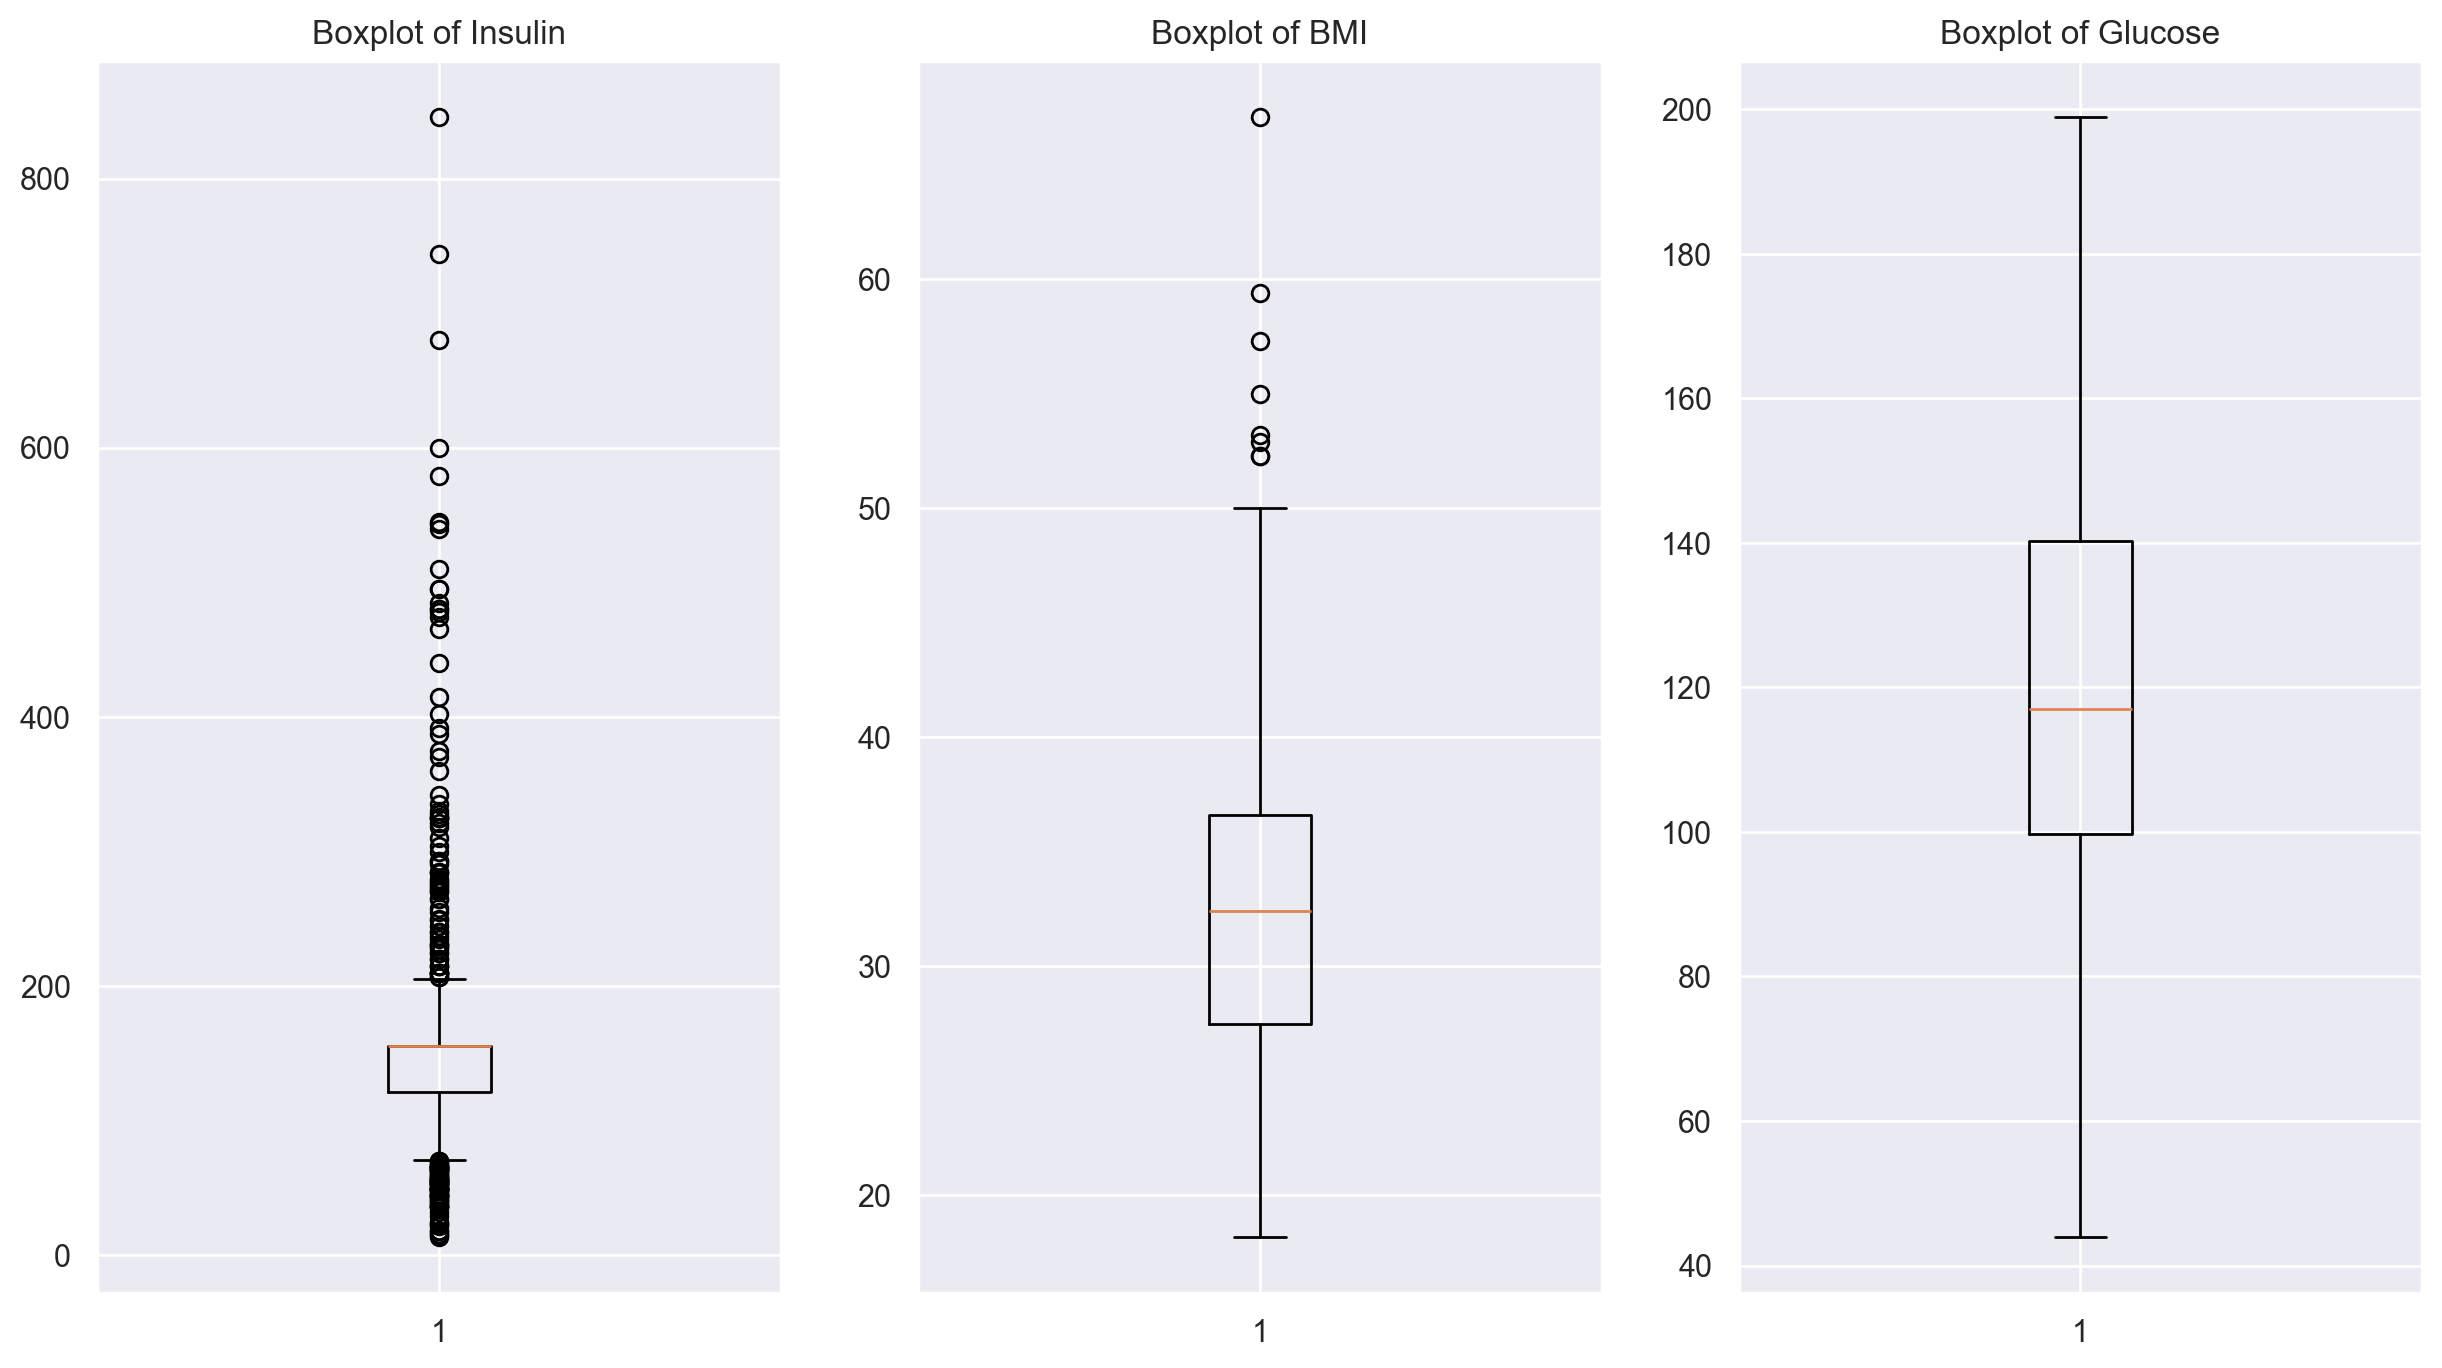

In [26]:
plt.figure(figsize=(15,8),dpi=200)
plt.subplot(1,3,1)
plt.title("Boxplot of Insulin")
plt.boxplot(data['Insulin'])
plt.subplot(1,3,2)
plt.title("Boxplot of BMI")
plt.boxplot(data['BMI'])
plt.subplot(1,3,3)
plt.title("Boxplot of Glucose")
plt.boxplot(data['Glucose'])
plt.show()

As we can see there are many outliers in the Insulin box plot, lets see it in detail with only positive patients's insulin data

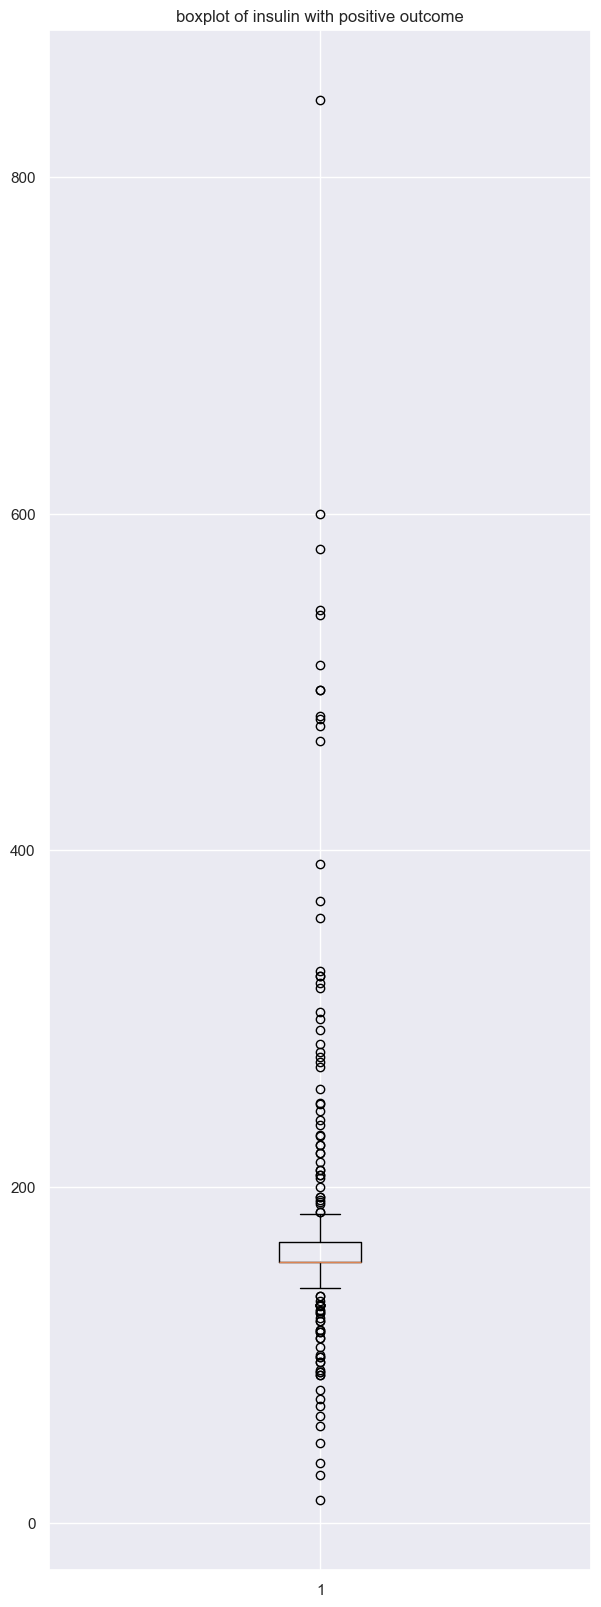

In [27]:
insulin_positive = data["Insulin"][data["Outcome"]==1]
plt.figure(figsize=(7,20))
plt.title("boxplot of insulin with positive outcome")
plt.boxplot(insulin_positive)
plt.show()

<Axes: >

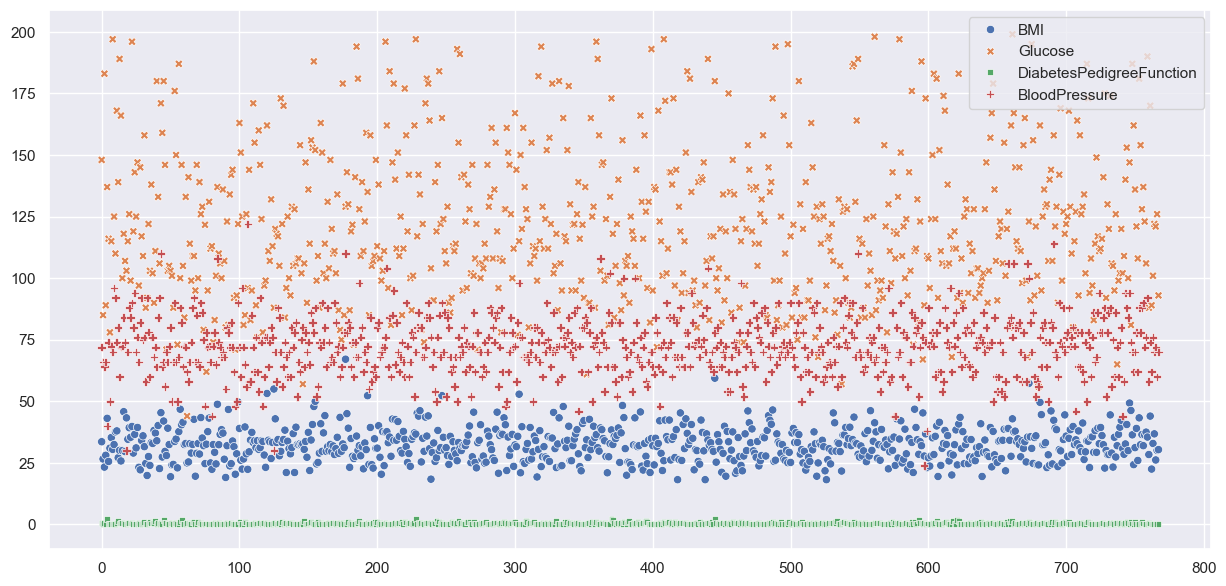

In [28]:
scatter = data[["BMI","Glucose","DiabetesPedigreeFunction","BloodPressure"]]
sns.set(rc={'figure.figsize':(15,7)})
sns.scatterplot(scatter)

<Axes: xlabel='Outcome', ylabel='BMI'>

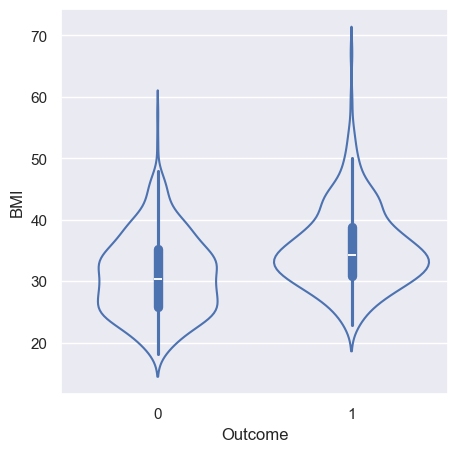

In [29]:
sns.set(rc={"figure.figsize":(5,5)})
sns.violinplot(data,x=data["Outcome"],y=data["BMI"],fill=False,split=False)


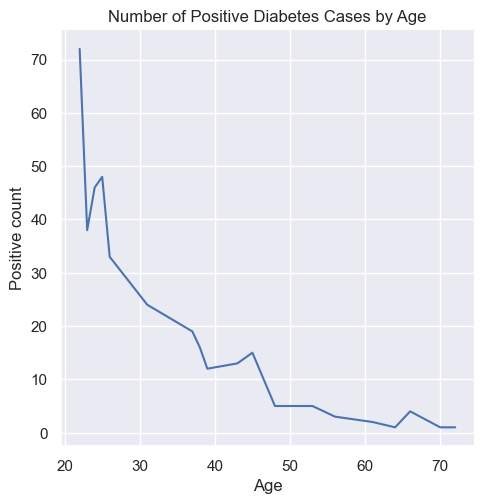

In [30]:
age_positive = data["Age"].value_counts()[data["Outcome"]==1]
age_positive.head()

sns.set(style="darkgrid")
sns.relplot(data=age_positive,kind="line",color = "b")
plt.title('Number of Positive Diabetes Cases by Age')
plt.xlabel("Age")
plt.ylabel("Positive count")
plt.show()

Now its time to select a model and train on the dataset. For this data we are going to test two model RandomForestClassifier and RandomSearchCV as these model constructs multiple decision trees, where each tree gives a class prediction. The final prediction is determined by majority voting across the trees. 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = data[["Age", "Glucose","BMI","Insulin"]]
y = data["Outcome"]
train_X,val_x, train_y, val_y = train_test_split(X,y,random_state=1)
model = RandomForestClassifier(random_state=1)
model.fit(train_X,train_y)
predict = model.predict(val_x)
acc = accuracy_score(val_y,predict)
print(acc)


0.7864583333333334


In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_X, train_y)

# Best parameters and model accuracy
best_model = rf_random.best_estimator_
predict = best_model.predict(val_x)
acc = accuracy_score(val_y, predict)
print("Improved accuracy: ", acc)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Improved accuracy:  0.7708333333333334


Visualizing the most features used by the model to perfom the prediction

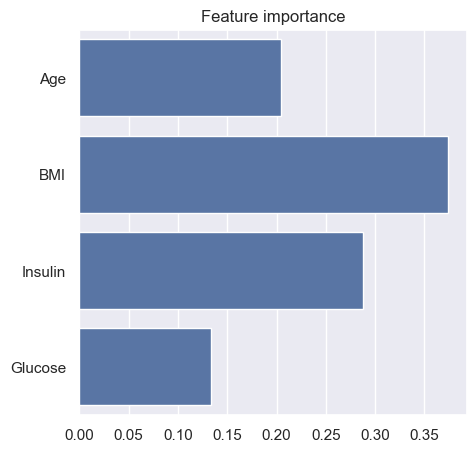

In [33]:
importance = model.feature_importances_
features = ["Age", "BMI", "Insulin","Glucose"]
sns.barplot(x=importance, y= features)
plt.title("Feature importance")
plt.show()

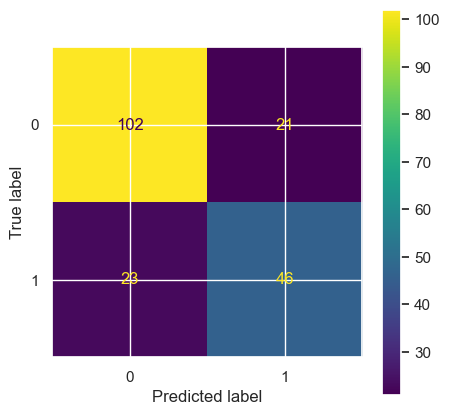

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

con_matrix = confusion_matrix(val_y,predict)
display = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
display.plot()
plt.show()

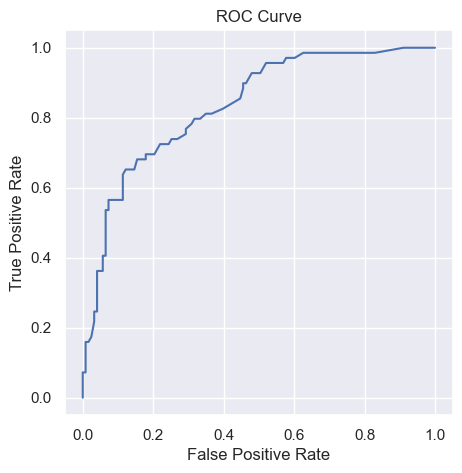

AUC Score:  0.8344526923530105


In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC curve
y_probs = model.predict_proba(val_x)[:, 1]
fpr, tpr, thresholds = roc_curve(val_y, y_probs)

plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

# AUC score
auc_score = roc_auc_score(val_y, y_probs)
print("AUC Score: ", auc_score)
